In [1]:
#!/usr/bin/env python
from os import makedirs
from os.path import join
from collections import Counter, OrderedDict
from pathlib import Path

from matplotlib import pyplot as plt
import pandas as pd
from svgelements import Color
from svgpathtools import svg2paths

In [2]:
input_dir = "../data/clean/tonari"
report = "../report"
figures = join(report, "figures")
tables = join(report, "tables")

makedirs(report, exist_ok=True)
makedirs(figures, exist_ok=True)
makedirs(tables, exist_ok=True)

In [3]:
stroke_colors = []
stroke_widths = []
svg_files = Path(input_dir).rglob("*.svg")
for svg_file in svg_files:
    _, path_attributes = svg2paths(str(svg_file))
    stroke_colors.extend([Color(p["stroke"]).hex for p in path_attributes])
    stroke_widths.extend([float(p["stroke-width"]) for p in path_attributes])

In [4]:
stroke_color_counter = Counter(stroke_colors)
stroke_width_counter = Counter(stroke_widths)
stroke_width_counter = OrderedDict({key: stroke_width_counter[key] for key in sorted(stroke_width_counter.keys())})
stroke_width_counter.pop(2)

62637

In [5]:
stroke_color_counter

Counter({'#000000': 45289,
         '#0000ff': 13944,
         '#ffffff': 5149,
         '#ff0000': 3728,
         '#00ff00': 486,
         '#120a0a': 76,
         '#0c0606': 63,
         '#180d0d': 10,
         '#ff8000': 7,
         '#49ff49': 6})

In [6]:
stroke_width_counter

OrderedDict([(1.0, 1),
             (1.5, 615),
             (1.51, 369),
             (2.5, 60),
             (3.0, 110),
             (3.59, 51),
             (4.0, 172),
             (4.55, 10),
             (5.0, 264),
             (6.0, 266),
             (6.05, 101),
             (6.09, 67),
             (6.11, 41),
             (6.53, 18),
             (7.0, 641),
             (7.07, 80),
             (7.52, 463),
             (8.0, 292),
             (9.99, 21),
             (10.0, 263),
             (10.66, 84),
             (12.0, 682),
             (15.0, 159),
             (15.34, 3),
             (15.39, 19),
             (16.83, 10),
             (17.0, 298),
             (17.59, 88),
             (17.7, 42),
             (18.01, 43),
             (18.96, 152),
             (19.65, 90),
             (20.0, 60),
             (25.0, 94),
             (26.16, 19),
             (27.79, 67),
             (30.0, 114),
             (40.0, 80),
             (46.12, 42),
         

In [7]:
df_color = pd.DataFrame.from_dict(stroke_color_counter, orient="index", columns=["Number of curves"])
df_color["color"] = df_color.index
df_color.style.applymap(lambda c: "background-color: " + c, subset=["color"])

,Number of curves,color
#0000ff,13944,#0000ff
#ffffff,5149,#ffffff
#ff0000,3728,#ff0000
#000000,45289,#000000
#00ff00,486,#00ff00
#120a0a,76,#120a0a
#0c0606,63,#0c0606
#180d0d,10,#180d0d
#49ff49,6,#49ff49
#ff8000,7,#ff8000


In [8]:
schema = ["#000000", "#302010", "#4c3219", "#654321", "#ff00ff", "#b100ff", "#7d00ff", "#0000ff", "#ffff00", "#ff9900", "#ff6700", "#ff0000", "#00ff00", "#00ffbf", "#02fff2", "#00d0ff", "#797878", "#b7b7b7", "#cccccc", "#d9d9d9"]
df_color = pd.DataFrame.from_dict(stroke_color_counter, orient="index", columns=["Number of paths"])
df_color.sort_values(by="Number of paths", inplace=True, ascending=False)
df_color["Color"] = df_color.index
df_color["Part of schema"] = df_color.index.map(lambda x: x in schema)
df_color["hex string"] = df_color.index.map(lambda x: "\\" + x)
df_color.Color = df_color.Color.apply(lambda x: "\\cellcolor{%s}\\color{%s}%s" % (x[1:], x[1:], x[1:]))
df_color = df_color[["hex string", "Color", "Part of schema", "Number of paths"]]
with open(join(tables, "stroke_color_counter.tex"), "w") as tex_file:
    latex = "\n".join(["\\definecolor{%s}{HTML}{%s}" % (x[2:], x[2:]) for x in df_color["hex string"]])
    latex += "\n" + df_color.to_latex(index=False)
    tex_file.write(latex)

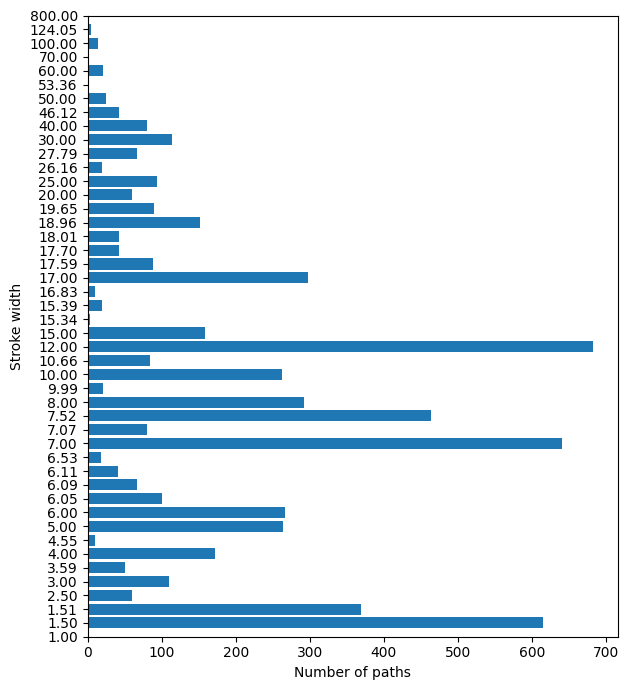

In [24]:
f = plt.figure()
f.set_figheight(7)
plt.barh(range(len(stroke_width_counter.keys())), stroke_width_counter.values())
plt.ylim([1, len(stroke_width_counter) - 1])
plt.yticks(range(len(stroke_width_counter.keys())), [format(k, ".2f") for k in stroke_width_counter.keys()])
plt.ylabel("Stroke width")
plt.xlabel("Number of paths")
f.tight_layout()
plt.savefig(join(figures, "stroke_width_counter.pdf"))